In [21]:
import re #Regular expression
import requests
import pandas as pd
from bs4 import BeautifulSoup
from time import sleep
from selenium import webdriver

In [3]:
driver = webdriver.Chrome(executable_path='chromedriver/chromedriver')
first_page=driver.get('https://www.cnbc.com/search/?query=aramco%20ipo&qsearchterm=aramco%20ipo')

sleep(2)
last_height = driver.execute_script("return document.body.scrollHeight")
while True:
    #   Scroll down to bottom
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    #   Wait to load page
    sleep(5)
#       Calculate new scroll height and compare with last scroll height
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height
    
html=driver.page_source # property/attribute -- Gets the source of the current page.
soup1 = BeautifulSoup(html,'html.parser')

<html itemtype="https://schema.org/WebPage" lang="en" prefix="og=https://ogp.me/ns#"><head><script src="https://www.googletagservices.com/activeview/js/current/osd.js?cb=%2Fr20100101"></script><script async="" src="https://www.googleadservices.com/pagead/conversion_async.js" type="text/javascript"></script><script src="https://d1z2jf7jlzjs58.cloudfront.net/code/ptrack-v1.3.1-engagedtime-slots-video.js"></script><script src="https://securepubads.g.doubleclick.net/gpt/pubads_impl_modern_rendering_2019112101.js?21065216"></script><script src="https://pagead2.googlesyndication.com/pagead/show_companion_ad.js"></script><script async="" id="iterate-script" src="https://platform.iteratehq.com/sdk-prod-6d6e1825359e3e4ea600.js" type="text/javascript"></script><script src="https://srv-2019-12-04-07.config.parsely.com/config/cnbc.com"></script><script src="https://nbcu.demdex.net/event?d_nsid=0&amp;d_ld=_ts%3D1575443504075&amp;d_rtbd=json&amp;d_jsonv=1&amp;d_dst=1&amp;d_cb=demdexRequestCallback_0
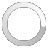

In [4]:
soup1

In [5]:
all_item=soup1.find_all('div', class_="SearchResult-searchResultContent")

In [6]:
len(all_item)

584

In [182]:
#cnbc
title_name = []
title_link = []
auther=[]
brief=[]
date=[]
typ = []
    
for i in all_item:
    title= i.findChildren('span' ,class_="Card-title")
    brief1 = i.findChildren('p', class_='SearchResult-searchResultPreview')
    linktitle= i.findChildren('a' ,class_="resultlink")        
    auther1 = i.findChildren('a', class_='SearchResult-author')
    auther2 = i.findChildren('span', class_='Card-byline')
    date1 = i.findChildren('span', class_='SearchResult-publishedDate')
    typ1= i.findChildren('div', class_='SearchResult-searchResultEyebrow')
    if len(title)>0:
        title_name.append(title[0].text.strip('\n').strip(' ').strip(' \n'))
    if len(brief1)>0:
        brief.append(brief1[0].text)
    else:
        brief.append('na')
    if len(auther1)>0:
        auther.append(auther1[0].text)
    elif len(auther2)>0:
        auther.append(auther2[0].text)
    else:
        auther.append('na')
    if len(date1)>0:
        date.append(date1[0].text)
    else:
        date.append('na')
    if len(typ1)>0:
        typ.append(typ1[0].text)
    else:
        typ.append('na')
    if len(linktitle)>0:
        title_link.append(linktitle[0]['href'])
    else:
        title_link.append('na')

In [183]:
df=pd.DataFrame()

In [186]:
df['title']=title_name
df['title_link']=title_link
df['brief']=brief
df['type']=typ
df['auther']=auther
df['date']=date

In [187]:
df['time']=df['date'].apply([lambda x: x.split(' ')[1]])

In [188]:
df['A-P']=df['date'].apply([lambda x: x.split(' ')[2]])

In [189]:
df['date1']=df['date'].apply([lambda x: x.split(' ')[0]])

In [190]:
df['time'][0]

'12:12:00'

In [191]:
df['A-P'][0]

'AM'

In [192]:
df['date1'][0]

'12/4/2019'

In [193]:
pd.set_option('display.max_rows', 100)

In [194]:
df.head()

,title,brief,type,auther,date,time,title_link,A-P,date1
0,UPDATE 1-Saudi Aramco IPO institutional tranch...,"(Adds details) RIYADH, Dec 3 (Reuters) - The i...",Wires,na,12/4/2019 12:12:00 AM,12:12:00,https://www.cnbc.com/2019/12/03/reuters-americ...,AM,12/4/2019
1,UPDATE 3-Saudi Arabia wants OPEC+ to deepen oi...,"* OPEC, allies may add 0.4 mln bpd to existing...",Wires,"Rania El Gamal, Alex Lawler and Olesya Astakhova",12/2/2019 3:38:00 PM,3:38:00,https://www.cnbc.com/2019/12/02/reuters-americ...,PM,12/2/2019
2,UPDATE 2-Saudi Arabia wants OPEC+ to deepen oi...,"* OPEC, allies may add 0.4 mln bpd to existing...",Wires,"Rania El Gamal, Alex Lawler and Olesya Astakhova",12/2/2019 1:15:00 PM,1:15:00,https://www.cnbc.com/2019/12/02/reuters-americ...,PM,12/2/2019
3,CORRECTED (OFFICIAL)-Institutions have subscri...,Aramco IPO - lead bankers@ (Corrects subscript...,Wires,na,12/4/2019 7:29:00 AM,7:29:00,https://www.cnbc.com/2019/12/03/reuters-americ...,AM,12/4/2019
4,UPDATE 2-Saudi exchange to limit Aramco index ...,"(Changes slug, adds details) DUBAI, Dec 2 (Reu...",Wires,Davide Barbuscia,12/2/2019 1:09:00 PM,1:09:00,https://www.cnbc.com/2019/12/02/reuters-americ...,PM,12/2/2019


In [229]:
df.tail()

,title,brief,type,auther,date,time,title_link,A-P,date1
579,Oil prices could go south of $40 a barrel if O...,"Oil prices could go under $40 a barrel, if the...",Energy,Christine Wang,11/1/2016 12:05:14 AM,12:05:14,https://www.cnbc.com/2016/10/31/oil-prices-cou...,AM,11/1/2016
580,The Faces of Davos 2011,A small town in the Swiss Alps is overrun for ...,Business,na,2/2/2011 7:06:43 PM,7:06:43,https://www.cnbc.com/2011/02/02/The-Faces-of-D...,PM,2/2/2011
581,A 30-year-old prince’s bold vision for Saudi A...,Saudi Arabia’s 30-year-old deputy crown prince...,Market Insider,Patti Domm,4/22/2016 2:02:08 AM,2:02:08,https://www.cnbc.com/2016/04/21/a-30-year-old-...,AM,4/22/2016
582,Oil could hit $80 per barrel by the end of 201...,This year could mark a comeback for commoditie...,Oil and Gas,Yen Nee Lee,1/3/2018 6:10:28 AM,6:10:28,https://www.cnbc.com/2018/01/02/oil-price-crud...,AM,1/3/2018
583,Climate change: Did we just witness the beginn...,Is the oil barrel half empty or half full? In ...,Evolve,Eric Rosenbaum,9/22/2019 4:00:01 PM,4:00:01,https://www.cnbc.com/2019/09/22/climate-change...,PM,9/22/2019


In [170]:
df.shape

(584, 8)

In [171]:
df.isnull().sum()

title     0
brief     0
type      0
auther    0
date      0
time      0
A-P       0
date1     0
dtype: int64

In [196]:
df['title_link'][0]

'https://www.cnbc.com/2019/12/03/reuters-america-update-1-saudi-aramco-ipo-institutional-tranche-2-point-95-times-oversubscribed.html?&qsearchterm=aramco ipo'

In [197]:
htm=[]
for i in df.title_link:
    page=driver.get(i)
    htm.append(driver.page_source)

In [232]:
len(htm)

584

In [251]:
text_news=[]
for ht in htm:    
    soup2 = BeautifulSoup(ht,'html.parser')
    all_p=soup2.find_all('div', class_="group")
    all_text=''
    for i in all_p:
        textnews = i.findChildren('p')
        for i in range(0,len(textnews)):
            all_text = all_text + textnews[i].text
    if len(all_text)>0:
        text_news.append(all_text)
    else:
        text_news.append('video') 

In [252]:
len(text_news)

584

In [253]:
text_news[583]

'Is the oil barrel half empty or half full? In the past week you had your pick of answers to choose from, and they were bookended nicely from the week’s beginning to its end.The missile and drone attack on the largest Saudi Arabian oil-refining operation, which resulted in the largest single-day gain for crude oil ever on Monday, reminded a world that had gone a long time without a geopolitical shock how central the role of oil remains.By Thursday, though, Amazon CEO Jeff Bezos — a man whose every latest decision is equated with doom for whoever is on the other side of the competition — announced his company would reach a goal of carbon neutrality by 2040, a decade ahead of the Paris Agreement goal. Bezos said 10,000 electric-delivery vehicles will be on the roads in just three years (2022) and 80% of Amazon will be operating on renewable energy by as early as 2024. By 2030 all of Amazon and 100,000 delivery trucks will be 100% powered by renewable energy. On the same day,\xa0Google an

In [254]:
df['text_news']=text_news
df['htm']=htm

In [255]:
no_text=[]
for i in range(0,len(df)):
    if df['text_news'][i]=='video':
        no_text.append(i) 

In [256]:
len(no_text)

196

In [257]:
no_text

[23,
 31,
 45,
 50,
 51,
 59,
 64,
 69,
 76,
 79,
 82,
 86,
 91,
 94,
 105,
 107,
 112,
 118,
 124,
 128,
 132,
 138,
 148,
 151,
 156,
 158,
 159,
 164,
 172,
 173,
 176,
 179,
 184,
 189,
 190,
 191,
 192,
 193,
 194,
 197,
 199,
 202,
 204,
 205,
 207,
 211,
 216,
 217,
 218,
 219,
 223,
 224,
 225,
 226,
 227,
 229,
 231,
 232,
 236,
 237,
 239,
 245,
 246,
 247,
 251,
 253,
 255,
 257,
 258,
 259,
 262,
 263,
 268,
 269,
 270,
 272,
 273,
 275,
 277,
 279,
 285,
 286,
 287,
 289,
 290,
 301,
 303,
 304,
 306,
 307,
 308,
 309,
 310,
 311,
 313,
 314,
 318,
 320,
 322,
 324,
 329,
 330,
 332,
 334,
 341,
 342,
 343,
 357,
 359,
 362,
 363,
 366,
 370,
 387,
 391,
 393,
 397,
 399,
 400,
 402,
 405,
 406,
 407,
 409,
 410,
 411,
 414,
 415,
 417,
 421,
 427,
 428,
 429,
 431,
 432,
 433,
 434,
 435,
 436,
 437,
 438,
 439,
 441,
 444,
 448,
 449,
 452,
 453,
 455,
 456,
 457,
 459,
 460,
 461,
 462,
 464,
 465,
 468,
 469,
 470,
 471,
 472,
 473,
 475,
 476,
 493,
 495,
 496,
 497,


In [258]:
df['text_news'][23]

'video'

In [259]:
df['title_link'][23]

'https://www.cnbc.com/video/2019/11/28/were-seeing-upside-for-saudi-aramco-shares-trading-higher-analyst.html?&qsearchterm=aramco ipo'

In [260]:
df.to_csv('cnbc_aramco_ipo.csv', index = False)

In [262]:
pip install textblob 

Note: you may need to restart the kernel to use updated packages.


In [263]:
import textblob 
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [265]:
dt = pd.DataFrame()

In [269]:
files = [fn for fn in os.listdir('.') if fn.endswith('.csv')]
for fn in files:
    dt = pd.concat([dt, pd.read_csv(fn)], ignore_index=True)
dt.drop_duplicates(subset='title', keep='first', inplace=True)
dt

,title,brief,type,auther,date,time,title_link,A-P,date1,text_news,htm
0,UPDATE 1-Saudi Aramco IPO institutional tranch...,"(Adds details) RIYADH, Dec 3 (Reuters) - The i...",Wires,na,12/4/2019 12:12:00 AM,12:12:00,https://www.cnbc.com/2019/12/03/reuters-americ...,AM,12/4/2019,"(Adds details)RIYADH, Dec 3 (Reuters) - The in...","<html lang=""en"" prefix=""og=https://ogp.me/ns#""..."
1,UPDATE 3-Saudi Arabia wants OPEC+ to deepen oi...,"* OPEC, allies may add 0.4 mln bpd to existing...",Wires,"Rania El Gamal, Alex Lawler and Olesya Astakhova",12/2/2019 3:38:00 PM,3:38:00,https://www.cnbc.com/2019/12/02/reuters-americ...,PM,12/2/2019,"* OPEC, allies may add 0.4 mln bpd to existing...","<html lang=""en"" prefix=""og=https://ogp.me/ns#""..."
2,UPDATE 2-Saudi Arabia wants OPEC+ to deepen oi...,"* OPEC, allies may add 0.4 mln bpd to existing...",Wires,"Rania El Gamal, Alex Lawler and Olesya Astakhova",12/2/2019 1:15:00 PM,1:15:00,https://www.cnbc.com/2019/12/02/reuters-americ...,PM,12/2/2019,"* OPEC, allies may add 0.4 mln bpd to existing...","<html lang=""en"" prefix=""og=https://ogp.me/ns#""..."
3,CORRECTED (OFFICIAL)-Institutions have subscri...,Aramco IPO - lead bankers@ (Corrects subscript...,Wires,na,12/4/2019 7:29:00 AM,7:29:00,https://www.cnbc.com/2019/12/03/reuters-americ...,AM,12/4/2019,Aramco IPO - lead bankers@ (Corrects subscript...,"<html lang=""en"" prefix=""og=https://ogp.me/ns#""..."
4,UPDATE 2-Saudi exchange to limit Aramco index ...,"(Changes slug, adds details) DUBAI, Dec 2 (Reu...",Wires,Davide Barbuscia,12/2/2019 1:09:00 PM,1:09:00,https://www.cnbc.com/2019/12/02/reuters-americ...,PM,12/2/2019,"(Changes slug, adds details)DUBAI, Dec 2 (Reut...","<html lang=""en"" prefix=""og=https://ogp.me/ns#""..."
5,"UPDATE 1-Abu Dhabi, Kuwait sovereign funds pla...",IPO-sources@ (Adds Kuwait wealth fund plans to...,Wires,"Rania El Gamal, Hadeel Al Sayegh and Saeed Azhar",11/27/2019 12:51:00 PM,12:51:00,https://www.cnbc.com/2019/11/27/reuters-americ...,PM,11/27/2019,IPO-sources@ (Adds Kuwait wealth fund plans to...,"<html lang=""en"" prefix=""og=https://ogp.me/ns#""..."
6,UPDATE 1-Saudi Arabia wants OPEC+ to deepen oi...,"(Updates with details, background) DUBAI/LONDO...",Wires,Rania El Gamal and Alex Lawler,12/2/2019 11:52:00 AM,11:52:00,https://www.cnbc.com/2019/12/02/reuters-americ...,AM,12/2/2019,"(Updates with details, background)DUBAI/LONDON...","<html lang=""en"" prefix=""og=https://ogp.me/ns#""..."
7,Saudi Arabia wants OPEC+ to deepen oil cuts du...,OPEC and its allies plan to deepen oil cuts an...,Energy,na,12/2/2019 12:14:01 PM,12:14:01,https://www.cnbc.com/2019/12/02/saudi-arabia-w...,PM,12/2/2019,OPEC and its allies plan to deepen oil cuts an...,"<html lang=""en"" prefix=""og=https://ogp.me/ns#""..."
8,UPDATE 1-Saudi Aramco IPO’s retail tranche ove...,"(Adds details, background) RIYADH, Nov 28 (Reu...",Wires,na,11/28/2019 4:10:00 PM,4:10:00,https://www.cnbc.com/2019/11/28/reuters-americ...,PM,11/28/2019,"(Adds details, background)RIYADH, Nov 28 (Reut...","<html lang=""en"" prefix=""og=https://ogp.me/ns#""..."
9,Saudi Aramco IPO’s retail tranche oversubscrib...,"RIYADH, Nov 28 (Reuters) - The retail portion ...",Wires,na,11/28/2019 3:37:00 PM,3:37:00,https://www.cnbc.com/2019/11/28/reuters-americ...,PM,11/28/2019,"RIYADH, Nov 28 (Reuters) - The retail portion ...","<html lang=""en"" prefix=""og=https://ogp.me/ns#""..."


In [270]:
dt.shape

(575, 11)

In [271]:
dn = pd.DataFrame()

In [272]:
files = [fn for fn in os.listdir('.') if fn.endswith('.csv')]
for fn in files:
    dn = pd.concat([dn, pd.read_csv(fn)], ignore_index=True)
dn.drop_duplicates(subset='text_news', keep='first', inplace=True)
dn

,title,brief,type,auther,date,time,title_link,A-P,date1,text_news,htm
0,UPDATE 1-Saudi Aramco IPO institutional tranch...,"(Adds details) RIYADH, Dec 3 (Reuters) - The i...",Wires,na,12/4/2019 12:12:00 AM,12:12:00,https://www.cnbc.com/2019/12/03/reuters-americ...,AM,12/4/2019,"(Adds details)RIYADH, Dec 3 (Reuters) - The in...","<html lang=""en"" prefix=""og=https://ogp.me/ns#""..."
1,UPDATE 3-Saudi Arabia wants OPEC+ to deepen oi...,"* OPEC, allies may add 0.4 mln bpd to existing...",Wires,"Rania El Gamal, Alex Lawler and Olesya Astakhova",12/2/2019 3:38:00 PM,3:38:00,https://www.cnbc.com/2019/12/02/reuters-americ...,PM,12/2/2019,"* OPEC, allies may add 0.4 mln bpd to existing...","<html lang=""en"" prefix=""og=https://ogp.me/ns#""..."
2,UPDATE 2-Saudi Arabia wants OPEC+ to deepen oi...,"* OPEC, allies may add 0.4 mln bpd to existing...",Wires,"Rania El Gamal, Alex Lawler and Olesya Astakhova",12/2/2019 1:15:00 PM,1:15:00,https://www.cnbc.com/2019/12/02/reuters-americ...,PM,12/2/2019,"* OPEC, allies may add 0.4 mln bpd to existing...","<html lang=""en"" prefix=""og=https://ogp.me/ns#""..."
3,CORRECTED (OFFICIAL)-Institutions have subscri...,Aramco IPO - lead bankers@ (Corrects subscript...,Wires,na,12/4/2019 7:29:00 AM,7:29:00,https://www.cnbc.com/2019/12/03/reuters-americ...,AM,12/4/2019,Aramco IPO - lead bankers@ (Corrects subscript...,"<html lang=""en"" prefix=""og=https://ogp.me/ns#""..."
4,UPDATE 2-Saudi exchange to limit Aramco index ...,"(Changes slug, adds details) DUBAI, Dec 2 (Reu...",Wires,Davide Barbuscia,12/2/2019 1:09:00 PM,1:09:00,https://www.cnbc.com/2019/12/02/reuters-americ...,PM,12/2/2019,"(Changes slug, adds details)DUBAI, Dec 2 (Reut...","<html lang=""en"" prefix=""og=https://ogp.me/ns#""..."
5,"UPDATE 1-Abu Dhabi, Kuwait sovereign funds pla...",IPO-sources@ (Adds Kuwait wealth fund plans to...,Wires,"Rania El Gamal, Hadeel Al Sayegh and Saeed Azhar",11/27/2019 12:51:00 PM,12:51:00,https://www.cnbc.com/2019/11/27/reuters-americ...,PM,11/27/2019,IPO-sources@ (Adds Kuwait wealth fund plans to...,"<html lang=""en"" prefix=""og=https://ogp.me/ns#""..."
6,UPDATE 1-Saudi Arabia wants OPEC+ to deepen oi...,"(Updates with details, background) DUBAI/LONDO...",Wires,Rania El Gamal and Alex Lawler,12/2/2019 11:52:00 AM,11:52:00,https://www.cnbc.com/2019/12/02/reuters-americ...,AM,12/2/2019,"(Updates with details, background)DUBAI/LONDON...","<html lang=""en"" prefix=""og=https://ogp.me/ns#""..."
7,Saudi Arabia wants OPEC+ to deepen oil cuts du...,OPEC and its allies plan to deepen oil cuts an...,Energy,na,12/2/2019 12:14:01 PM,12:14:01,https://www.cnbc.com/2019/12/02/saudi-arabia-w...,PM,12/2/2019,OPEC and its allies plan to deepen oil cuts an...,"<html lang=""en"" prefix=""og=https://ogp.me/ns#""..."
8,UPDATE 1-Saudi Aramco IPO’s retail tranche ove...,"(Adds details, background) RIYADH, Nov 28 (Reu...",Wires,na,11/28/2019 4:10:00 PM,4:10:00,https://www.cnbc.com/2019/11/28/reuters-americ...,PM,11/28/2019,"(Adds details, background)RIYADH, Nov 28 (Reut...","<html lang=""en"" prefix=""og=https://ogp.me/ns#""..."
9,Saudi Aramco IPO’s retail tranche oversubscrib...,"RIYADH, Nov 28 (Reuters) - The retail portion ...",Wires,na,11/28/2019 3:37:00 PM,3:37:00,https://www.cnbc.com/2019/11/28/reuters-americ...,PM,11/28/2019,"RIYADH, Nov 28 (Reuters) - The retail portion ...","<html lang=""en"" prefix=""og=https://ogp.me/ns#""..."


In [273]:
dn.shape

(387, 11)

In [274]:
def remove_urls(a_string): # 'Hi all https://twitter.com' =-> Hi All
    return re.sub(r"http\S+", "", a_string).strip()

In [275]:
def remove_punc(a_string):
    return ' '.join(re.findall('\w+', a_string))

In [276]:
def remove_repeat(a_string):
    return re.sub(r'(.)\1+', r'\1', a_string)

In [277]:
def clean(x):
    return remove_repeat(remove_punc(remove_urls(x)))

In [278]:
dt['cleaned'] = dt['title'].apply(clean)
dn['cleaned'] = dn['text_news'].apply(clean)

In [279]:
dt.drop_duplicates(subset='cleaned', keep='first', inplace=True)
dn.drop_duplicates(subset='cleaned', keep='first', inplace=True)

In [280]:
pos = 0
neg = 0
nat = 0
titles = []
classes = []
for t in dt['title']:
    titles.append(t)
    tb = textblob.TextBlob(t)
    if tb.polarity == 0:
        nat += 1
        classes.append('nat')
    elif tb.polarity > 0:
        pos += 1
        classes.append('pos')
    elif tb.polarity < 0:
        neg += 1
        classes.append('neg')
    print(tb.polarity)
    print('-' * 10)
dt2 = pd.DataFrame({'title': titles, 'class': classes})

0.0
----------
0.037500000000000006
----------
0.037500000000000006
----------
0.0
----------
0.0
----------
0.0
----------
0.037500000000000006
----------
0.037500000000000006
----------
0.0
----------
0.0
----------
0.0
----------
-0.3
----------
0.0
----------
0.0
----------
-0.3
----------
0.0
----------
0.0
----------
0.5
----------
0.05
----------
0.0
----------
0.0
----------
0.1
----------
0.5
----------
0.25
----------
0.0
----------
0.0
----------
0.0
----------
0.0
----------
0.0
----------
-0.16666666666666666
----------
-0.16666666666666666
----------
-0.2916666666666667
----------
0.0
----------
0.1
----------
0.0
----------
0.0
----------
-0.2
----------
0.1
----------
0.0
----------
0.03333333333333333
----------
0.0
----------
0.0
----------
0.0
----------
0.0
----------
0.0
----------
0.0
----------
-0.2
----------
-0.08333333333333333
----------
0.0
----------
0.0
----------
-0.5
----------
0.0
----------
0.0
----------
0.0
----------
0.0
----------
0.0
----------
0.

In [281]:
print('NEG:', neg)
print('POS:', pos)
print('NAT:', nat)
print('TOTAL:', neg + pos + nat)

NEG: 77
POS: 144
NAT: 354
TOTAL: 575


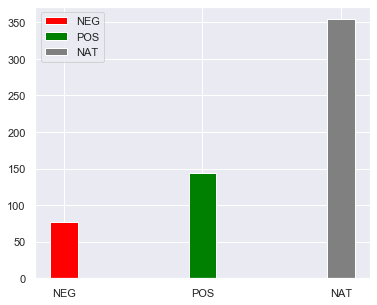

In [292]:
x = [2, 4, 6]
y = [neg, pos, nat]
colors = ['red', 'green', 'grey']
ticks = ['NEG', 'POS', 'NAT']
i = 0
plt.figure(figsize=(6,5))
for xi, yi in zip(x, y):
    plt.bar(xi, yi, color=colors[i], label=ticks[i], width=0.4)
    i += 1
plt.xticks(x, ticks)
plt.legend()

In [283]:
dt2.head()

,title,class
0,UPDATE 1-Saudi Aramco IPO institutional tranch...,nat
1,UPDATE 3-Saudi Arabia wants OPEC+ to deepen oi...,pos
2,UPDATE 2-Saudi Arabia wants OPEC+ to deepen oi...,pos
3,CORRECTED (OFFICIAL)-Institutions have subscri...,nat
4,UPDATE 2-Saudi exchange to limit Aramco index ...,nat


In [295]:
dt2.to_csv('title_analysis_cnbc_aramco_ipo.csv', index = False)

In [285]:
dn= dn[~dn.text_news.str.contains('video')]

In [287]:
pos1 = 0
neg1 = 0
nat1 = 0
text_news1 = []
classes1 = []
for t in dn['text_news']:
    text_news1.append(t)
    tb = textblob.TextBlob(t)
    if tb.polarity == 0:
        nat1 += 1
        classes1.append('nat')
    elif tb.polarity > 0:
        pos1 += 1
        classes1.append('pos')
    elif tb.polarity < 0:
        neg1 += 1
        classes1.append('neg')
    print(tb.polarity)
    print('-' * 10)
dn2 = pd.DataFrame({'text_news': text_news1, 'class': classes1})

0.11944444444444445
----------
0.10207466486155012
----------
0.1000656157259931
----------
0.06666666666666667
----------
0.13342416512059369
----------
0.02098214285714286
----------
0.06929640318529208
----------
0.06929640318529208
----------
0.10375000000000001
----------
-0.05714285714285715
----------
0.029296874999999997
----------
0.015208333333333334
----------
0.2005050505050505
----------
-0.002777777777777777
----------
-0.3
----------
0.037500000000000006
----------
0.0412797619047619
----------
0.04532085561497325
----------
-0.04113372093023256
----------
0.037500000000000006
----------
0.058666666666666666
----------
-0.03157894736842106
----------
0.010879790940766548
----------
-0.02118257038469804
----------
-0.005711181583274605
----------
0.0007352941176470562
----------
0.18333333333333335
----------
0.075
----------
0.03254846079846079
----------
0.02399989120227215
----------
0.05237207237207237
----------
0.04111111111111109
----------
0.08284722222222222
----

0.029455470194906824
----------
0.037686934277843365
----------
0.0653150826446281
----------
0.07885354073786907
----------
0.1421397415715597
----------
0.022496205345042552
----------
0.1133911301464493
----------
0.09190171807359307
----------
-0.011176470588235298
----------
0.1168104118104118
----------
0.023478428351309717
----------
0.007718489240228372
----------
0.17190679690679692
----------
0.05159983374113811
----------
0.05533406706288061
----------
-0.005683060109289621
----------
-0.005591397849462369
----------
0.002845238095238103
----------
-0.05822981366459627
----------
-0.015051715788017159
----------
0.0630495867768595
----------
0.26366161616161615
----------
0.14724014336917562
----------
0.049303515798842915
----------
0.02775897811109079
----------
0.033092105263157895
----------
0.049767163156993664
----------
0.07424568101651437
----------
0.11414755457308652
----------
0.023833333333333335
----------
0.09582644628099175
----------
0.05611111111111112
-----

In [288]:
print('NEG:', neg1)
print('POS:', pos1)
print('NAT:', nat1)
print('TOTAL:', neg1 + pos1 + nat1)

NEG: 55
POS: 317
NAT: 4
TOTAL: 376


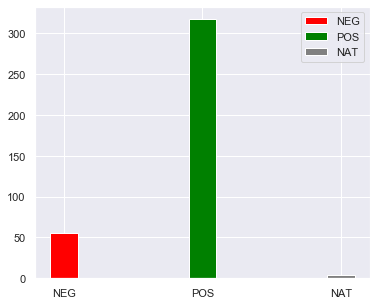

In [293]:
x = [2, 4, 6]
y = [neg1, pos1, nat1]
colors = ['red', 'green', 'grey']
ticks = ['NEG', 'POS', 'NAT']
i = 0
plt.figure(figsize=(6,5))
for xi, yi in zip(x, y):
    plt.bar(xi, yi, color=colors[i], label=ticks[i], width=0.4)
    i += 1
plt.xticks(x, ticks)
plt.legend()

In [294]:
dn2.head()

,text_news,class
0,"(Adds details)RIYADH, Dec 3 (Reuters) - The in...",pos
1,"* OPEC, allies may add 0.4 mln bpd to existing...",pos
2,"* OPEC, allies may add 0.4 mln bpd to existing...",pos
3,Aramco IPO - lead bankers@ (Corrects subscript...,pos
4,"(Changes slug, adds details)DUBAI, Dec 2 (Reut...",pos


In [296]:
dn2.to_csv('text_news_analysis_cnbc_aramco_ipo.csv', index = False)